In [23]:
import pandas as pd
data=pd.read_excel('missing_data.xls',header=None)
data

,0,1,2
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN
5,NaN,404.0480,486.0912
6,237.4167,391.2652,516.2330
7,238.6563,380.8241,NaN
8,237.6042,388.0230,435.3508
9,238.0313,206.4349,487.6750


In [24]:
data.describe()

,0,1,2
count,19.000000,17.000000,17.000000
mean,236.262626,363.666265,553.901624
std,1.225465,57.600529,67.707729
min,234.468800,206.434900,435.350800
25%,235.494800,328.089700,514.890000
50%,235.906300,388.023000,538.347000
75%,237.192750,401.623400,611.340800
max,238.656300,416.879500,660.234700


In [2]:
from scipy.interpolate import lagrange 
def ployinterp_column(s, n, k=5):
    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))]
    y = y[y.notnull()] #剔除空值
    return lagrange(y.index, list(y))(n) #插值并返回插值结果

for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]: #如果为空即插值。
             data[i][j] = ployinterp_column(data[i], j)

data

/home/hjz/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,0,1,2
0,235.833300,324.034300,478.323100
1,236.270800,325.637900,515.456400
2,238.052100,328.089700,517.090900
3,235.906300,203.462116,514.890000
4,236.760400,268.832400,493.352591
5,237.151181,404.048000,486.091200
6,237.416700,391.265200,516.233000
7,238.656300,380.824100,493.342382
8,237.604200,388.023000,435.350800
9,238.031300,206.434900,487.675000


In [15]:
data=pd.read_excel('model.xls')

from random import shuffle
data = data.values
shuffle(data)

p = 0.8
train = data[:int(len(data)*p),:] #前 80%为训练集
test = data[int(len(data)*p):,:] #后 20%为测试集

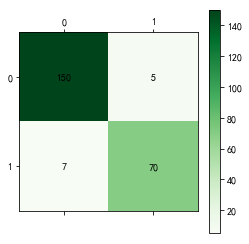

In [19]:
from sklearn.tree import DecisionTreeClassifier #导入决策树模型
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
from sklearn.externals import joblib
import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import roc_curve,auc #导入 ROC 曲线函数

tree = DecisionTreeClassifier()
tree.fit(train[:,:3],train[:,3]) 

joblib.dump(tree, 'tree.pkl')

cm = confusion_matrix(train[:,3], tree.predict(train[:,:3])) #混淆矩阵
plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用 cm.Greens
plt.colorbar() #颜色标签
for x in range(len(cm)): #数据标签
    for y in range(len(cm)): 
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.show()



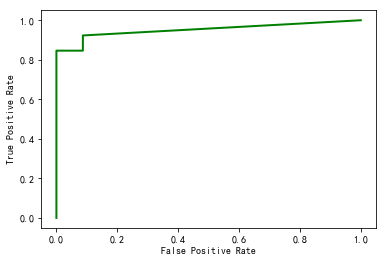

0.9515050167224081


In [20]:
fpr, tpr, thresholds = roc_curve(test[:,3], tree.predict_proba(test[:,:3])[:,1],
pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'green') #作出 ROC 曲线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(auc(fpr, tpr))

In [7]:
from keras.models import Sequential #导入神经网络初始化函数
from keras.layers.core import Dense,Activation #导入神经网络层函数、激活函数
net=Sequential()#建立神经网络
net.add(Dense(input_dim=3, units=10))
net.add(Activation('relu'))#使用激活函数（relu）
net.add(Dense(input_dim=10, units=1))
net.add(Activation('sigmoid'))#使用激活函数（relu）
net.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#编译模型
net.fit(train[:,:3], train[:,3], epochs=1000, batch_size=1) #训练模型，循环 1000 次
net.save_weights('net.model') #保存模型

predict_result=net.predict_classes(train[:,:3]).reshape(len(train))#预测结果变形
# predict_result

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
232/232 [==============================] - 1s 5ms/step - loss: 1.5992 - acc: 0.3534
Epoch 2/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.7690 - acc: 0.4483
Epoch 3/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.6307 - acc: 0.6853
Epoch 4/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.5924 - acc: 0.7457
Epoch 5/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.5591 - acc: 0.7974
Epoch 6/1000
232/232 [==============================] - 1s 6ms/step - loss: 0.5235 - acc: 0.8147
Epoch 7/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.4972 - acc: 0.8362
Epoch 8/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.4717 - acc: 0.8362
Epoch 9/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.4543 - acc: 0.8621
Epoch 1

232/232 [==============================] - 0s 2ms/step - loss: 0.2676 - acc: 0.8966
Epoch 79/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2680 - acc: 0.8966
Epoch 80/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2671 - acc: 0.8966
Epoch 81/1000
232/232 [==============================] - 1s 5ms/step - loss: 0.2679 - acc: 0.9009
Epoch 82/1000
232/232 [==============================] - 1s 6ms/step - loss: 0.2668 - acc: 0.8966
Epoch 83/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2663 - acc: 0.8966
Epoch 84/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2663 - acc: 0.8966
Epoch 85/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2668 - acc: 0.9009
Epoch 86/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2693 - acc: 0.8966
Epoch 87/1000
232/232 [==============================] - 1s 5ms/step - loss: 0.2663 - acc: 0.8966
Epoch 88/1000
232/232 [===========

232/232 [==============================] - 1s 3ms/step - loss: 0.2466 - acc: 0.8966
Epoch 161/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2424 - acc: 0.8966
Epoch 162/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2408 - acc: 0.9052
Epoch 163/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2434 - acc: 0.9009
Epoch 164/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2424 - acc: 0.9009
Epoch 165/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2464 - acc: 0.8966
Epoch 166/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2418 - acc: 0.9009
Epoch 167/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2403 - acc: 0.9009
Epoch 168/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2467 - acc: 0.8966
Epoch 169/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2429 - acc: 0.8966
Epoch 170/1000
232/232 [=

232/232 [==============================] - 1s 2ms/step - loss: 0.2323 - acc: 0.9009
Epoch 243/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2317 - acc: 0.9009
Epoch 244/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2316 - acc: 0.9009
Epoch 245/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2275 - acc: 0.9009
Epoch 246/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2320 - acc: 0.9009
Epoch 247/1000
232/232 [==============================] - 0s 993us/step - loss: 0.2324 - acc: 0.9052
Epoch 248/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2254 - acc: 0.9052
Epoch 249/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2313 - acc: 0.9052
Epoch 250/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2288 - acc: 0.9009
Epoch 251/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2284 - acc: 0.9095
Epoch 252/1000
232/232 

232/232 [==============================] - 0s 2ms/step - loss: 0.2244 - acc: 0.9009
Epoch 325/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2238 - acc: 0.9009
Epoch 326/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2245 - acc: 0.9009
Epoch 327/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2274 - acc: 0.9009
Epoch 328/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2239 - acc: 0.9009
Epoch 329/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2211 - acc: 0.9052
Epoch 330/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2304 - acc: 0.9009
Epoch 331/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2261 - acc: 0.9009
Epoch 332/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2232 - acc: 0.9095
Epoch 333/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2249 - acc: 0.9009
Epoch 334/1000
232/232 [=

/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.375705). Check your callbacks.
  % delta_t_median)
/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.189281). Check your callbacks.
  % delta_t_median)


232/232 [==============================] - 1s 6ms/step - loss: 0.2247 - acc: 0.9052
Epoch 353/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2246 - acc: 0.9009
Epoch 354/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2229 - acc: 0.9095
Epoch 355/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2216 - acc: 0.9052
Epoch 356/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2236 - acc: 0.9009
Epoch 357/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2231 - acc: 0.9009
Epoch 358/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2212 - acc: 0.9009
Epoch 359/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2241 - acc: 0.9009
Epoch 360/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2213 - acc: 0.9009
Epoch 361/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2211 - acc: 0.9052
Epoch 362/1000
232/232 [=

/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.503471). Check your callbacks.
  % delta_t_median)
/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.253933). Check your callbacks.
  % delta_t_median)


232/232 [==============================] - 1s 6ms/step - loss: 0.2220 - acc: 0.9009
Epoch 371/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2197 - acc: 0.9095
Epoch 372/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2186 - acc: 0.9009
Epoch 373/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2261 - acc: 0.9052
Epoch 374/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2235 - acc: 0.9052
Epoch 375/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2220 - acc: 0.9009
Epoch 376/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2165 - acc: 0.9009
Epoch 377/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2238 - acc: 0.9052
Epoch 378/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2205 - acc: 0.9095
Epoch 379/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2217 - acc: 0.9095
Epoch 380/1000
232/232 [=

232/232 [==============================] - 0s 1ms/step - loss: 0.2173 - acc: 0.9009
Epoch 453/1000
232/232 [==============================] - 2s 7ms/step - loss: 0.2196 - acc: 0.9009
Epoch 454/1000
232/232 [==============================] - 0s 963us/step - loss: 0.2160 - acc: 0.9052
Epoch 455/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2174 - acc: 0.9009
Epoch 456/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.9095
Epoch 457/1000
232/232 [==============================] - 0s 989us/step - loss: 0.2152 - acc: 0.9009
Epoch 458/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2174 - acc: 0.9009
Epoch 459/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2148 - acc: 0.9052
Epoch 460/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9052
Epoch 461/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2172 - acc: 0.9009
Epoch 462/1000
232/23

/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.502846). Check your callbacks.
  % delta_t_median)
/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252869). Check your callbacks.
  % delta_t_median)


232/232 [==============================] - 1s 4ms/step - loss: 0.2161 - acc: 0.8966
Epoch 487/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2152 - acc: 0.9052
Epoch 488/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2157 - acc: 0.9009
Epoch 489/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2169 - acc: 0.9009
Epoch 490/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2175 - acc: 0.9052
Epoch 491/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.9052
Epoch 492/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2145 - acc: 0.9009
Epoch 493/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2152 - acc: 0.9009
Epoch 494/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2150 - acc: 0.9009
Epoch 495/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2162 - acc: 0.9009
Epoch 496/1000
232/232 [=

232/232 [==============================] - 0s 2ms/step - loss: 0.2153 - acc: 0.9009
Epoch 569/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2129 - acc: 0.9009
Epoch 570/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2118 - acc: 0.9052
Epoch 571/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2107 - acc: 0.9009
Epoch 572/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2114 - acc: 0.9009
Epoch 573/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2109 - acc: 0.9052
Epoch 574/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2126 - acc: 0.9009
Epoch 575/1000
232/232 [==============================] - 0s 928us/step - loss: 0.2098 - acc: 0.9009
Epoch 576/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2110 - acc: 0.9009
Epoch 577/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2097 - acc: 0.9052
Epoch 578/1000
232/232 

/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.370390). Check your callbacks.
  % delta_t_median)
/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.191819). Check your callbacks.
  % delta_t_median)


232/232 [==============================] - 1s 3ms/step - loss: 0.2105 - acc: 0.9181
Epoch 599/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2129 - acc: 0.9009
Epoch 600/1000
232/232 [==============================] - 0s 936us/step - loss: 0.2107 - acc: 0.9009
Epoch 601/1000
232/232 [==============================] - 0s 913us/step - loss: 0.2145 - acc: 0.9009
Epoch 602/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2102 - acc: 0.9009
Epoch 603/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2127 - acc: 0.9052
Epoch 604/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2067 - acc: 0.9095
Epoch 605/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2138 - acc: 0.9052
Epoch 606/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2119 - acc: 0.9009
Epoch 607/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2133 - acc: 0.9095
Epoch 608/1000
232/23

232/232 [==============================] - 0s 2ms/step - loss: 0.2098 - acc: 0.8966
Epoch 681/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2090 - acc: 0.9095
Epoch 682/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2060 - acc: 0.9095
Epoch 683/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2156 - acc: 0.9095
Epoch 684/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2107 - acc: 0.9009
Epoch 685/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2120 - acc: 0.8966
Epoch 686/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2070 - acc: 0.9009
Epoch 687/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2107 - acc: 0.9009
Epoch 688/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2076 - acc: 0.9009
Epoch 689/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2095 - acc: 0.8966
Epoch 690/1000
232/232 [=

232/232 [==============================] - 0s 2ms/step - loss: 0.2077 - acc: 0.9052
Epoch 763/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2080 - acc: 0.8966
Epoch 764/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2121 - acc: 0.9052
Epoch 765/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2080 - acc: 0.9052
Epoch 766/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2073 - acc: 0.9009
Epoch 767/1000
232/232 [==============================] - 0s 953us/step - loss: 0.2062 - acc: 0.9138
Epoch 768/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2087 - acc: 0.9224
Epoch 769/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2122 - acc: 0.8966
Epoch 770/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2094 - acc: 0.9009
Epoch 771/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2075 - acc: 0.9138
Epoch 772/1000
232/232 

232/232 [==============================] - 0s 946us/step - loss: 0.2075 - acc: 0.9009
Epoch 845/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2064 - acc: 0.9052
Epoch 846/1000
232/232 [==============================] - 0s 961us/step - loss: 0.2087 - acc: 0.9009
Epoch 847/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2057 - acc: 0.9095
Epoch 848/1000
232/232 [==============================] - 0s 989us/step - loss: 0.2096 - acc: 0.9095
Epoch 849/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2098 - acc: 0.8966
Epoch 850/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2086 - acc: 0.9052
Epoch 851/1000
232/232 [==============================] - 0s 987us/step - loss: 0.2062 - acc: 0.9009
Epoch 852/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2085 - acc: 0.9009
Epoch 853/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2076 - acc: 0.9095
Epoch 854/1000
23

232/232 [==============================] - 0s 985us/step - loss: 0.2067 - acc: 0.9138
Epoch 927/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2116 - acc: 0.8966
Epoch 928/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2062 - acc: 0.9052
Epoch 929/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2073 - acc: 0.9009
Epoch 930/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2037 - acc: 0.9095
Epoch 931/1000
232/232 [==============================] - 0s 927us/step - loss: 0.2075 - acc: 0.9009
Epoch 932/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2058 - acc: 0.8966
Epoch 933/1000
232/232 [==============================] - 1s 5ms/step - loss: 0.2024 - acc: 0.9224
Epoch 934/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2090 - acc: 0.9052
Epoch 935/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2064 - acc: 0.9095
Epoch 936/1000
232/23

/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.502329). Check your callbacks.
  % delta_t_median)
/home/hjz/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.252479). Check your callbacks.
  % delta_t_median)


232/232 [==============================] - 1s 4ms/step - loss: 0.2045 - acc: 0.8966
Epoch 947/1000
232/232 [==============================] - 1s 4ms/step - loss: 0.2080 - acc: 0.9052
Epoch 948/1000
232/232 [==============================] - 0s 977us/step - loss: 0.2038 - acc: 0.9138
Epoch 949/1000
232/232 [==============================] - 0s 976us/step - loss: 0.2062 - acc: 0.9095
Epoch 950/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2082 - acc: 0.9095
Epoch 951/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2068 - acc: 0.9095
Epoch 952/1000
232/232 [==============================] - 0s 959us/step - loss: 0.2071 - acc: 0.9009
Epoch 953/1000
232/232 [==============================] - 0s 968us/step - loss: 0.2026 - acc: 0.9181
Epoch 954/1000
232/232 [==============================] - 0s 2ms/step - loss: 0.2126 - acc: 0.9009
Epoch 955/1000
232/232 [==============================] - 1s 3ms/step - loss: 0.2071 - acc: 0.9009
Epoch 956/1000
23

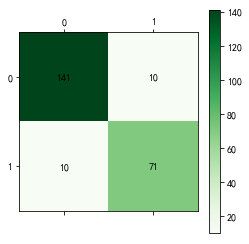

In [8]:
cm = confusion_matrix(train[:,3], predict_result) #混淆矩阵
plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用 cm.Greens
plt.colorbar() #颜色标签
for x in range(len(cm)): #数据标签
    for y in range(len(cm)): 
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.show()

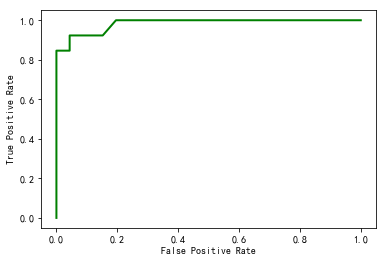

0.9832775919732442


In [21]:
predict_result=net.predict(test[:,:3]).reshape(len(test))#预测结果变形
fpr, tpr, thresholds = roc_curve(test[:,3], predict_result,pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of LM', color = 'green') #作出 ROC 曲线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(auc(fpr, tpr))